<a href="https://colab.research.google.com/github/owilli38/DSBA-6211/blob/main/FinalProject6211_for_EDA_Maps_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
df1 = pd.read_csv('/content/calendar.csv.gz')
df2 = pd.read_csv('/content/listings.csv.gz')
df3 = pd.read_csv('/content/neighbourhoods.csv')
df4 = pd.read_csv('/content/reviews.csv.gz', quoting=3, on_bad_lines='warn')
df5 = gpd.read_file('/content/neighbourhoods.geojson')

Streaming output truncated to the last 5000 lines.
Skipping line 1089805: expected 12 fields, saw 13
Skipping line 1089829: expected 12 fields, saw 13
Skipping line 1089831: expected 12 fields, saw 13
Skipping line 1089839: expected 12 fields, saw 13
Skipping line 1089840: expected 12 fields, saw 14
Skipping line 1089857: expected 12 fields, saw 18
Skipping line 1089874: expected 12 fields, saw 14
Skipping line 1089882: expected 12 fields, saw 14
Skipping line 1089893: expected 12 fields, saw 22
Skipping line 1089899: expected 12 fields, saw 13
Skipping line 1089912: expected 12 fields, saw 13
Skipping line 1089923: expected 12 fields, saw 14
Skipping line 1089937: expected 12 fields, saw 14
Skipping line 1089941: expected 12 fields, saw 15
Skipping line 1089944: expected 12 fields, saw 13
Skipping line 1089977: expected 12 fields, saw 15
Skipping line 1089989: expected 12 fields, saw 17
Skipping line 1089996: expected 12 fields, saw 14
Skipping line 1090019: expected 12 fields, saw 15

In [ ]:
# Assuming df2 is your DataFrame
df2['Occupancy_Rate'] = (365 - df2['availability_365']) / 365

# Assuming df2 is your DataFrame and you have already created the 'Occupancy_Rate' column
occupancy_rate_summary = df2['Occupancy_Rate'].describe()
print(occupancy_rate_summary)

count    57963.000000
mean         0.345081
std          0.348423
min          0.000000
25%          0.016438
50%          0.263014
75%          0.567123
max          1.000000
Name: Occupancy_Rate, dtype: float64


In [ ]:
print(df1.head())
print(df2.head())
print(df4.head())


   listing_id        date available   price adjusted_price  minimum_nights  \
0       83038  2024-12-30         f  $50.00            NaN             4.0   
1       83038  2024-12-31         f  $50.00            NaN             4.0   
2       83038  2025-01-01         f  $50.00            NaN             4.0   
3       83038  2025-01-02         f  $50.00            NaN             4.0   
4       83038  2025-01-03         f  $50.00            NaN             4.0   

   maximum_nights  
0            28.0  
1            28.0  
2            28.0  
3            28.0  
4            28.0  
      id                         listing_url       scrape_id last_scraped  \
0   7011   https://www.airbnb.com/rooms/7011  20241230011704   2024-12-30   
1  22948  https://www.airbnb.com/rooms/22948  20241230011704   2024-12-30   
2  35264  https://www.airbnb.com/rooms/35264  20241230011704   2024-12-30   
3  43992  https://www.airbnb.com/rooms/43992  20241230011704   2024-12-30   
4  43995  https://www.airb

In [ ]:
# For df1:
nan_count_df1 = df1.isna().sum().sum()
print("Total NaNs in df1:", nan_count_df1)

# For df2
nan_count_df2 = df2.isna().sum().sum()
print("Total NaNs in df2:", nan_count_df2)

# For df3:
nan_count_df3 = df3.isna().sum().sum()
print("Total NaNs in df3:", nan_count_df3)

# For df4:
nan_count_df4 = df4.isna().sum().sum()
print("Total NaNs in df4:", nan_count_df4)

# For df5 (geopandas DataFrame):
nan_count_df5 = df5.isna().sum().sum()
print("Total NaNs in df5:", nan_count_df5)

Total NaNs in df1: 21141307
Total NaNs in df2: 564505
Total NaNs in df3: 390
Total NaNs in df4: 1060623
Total NaNs in df5: 390


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57963 entries, 0 to 57962
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            57963 non-null  int64  
 1   listing_url                                   57963 non-null  object 
 2   scrape_id                                     57963 non-null  int64  
 3   last_scraped                                  57963 non-null  object 
 4   source                                        57963 non-null  object 
 5   name                                          57963 non-null  object 
 6   description                                   56172 non-null  object 
 7   neighborhood_overview                         26238 non-null  object 
 8   picture_url                                   57963 non-null  object 
 9   host_id                                       57963 non-null 

In [ ]:
num_listings = len(df2)
print("Number of listings:", num_listings)

Number of listings: 57963


In [ ]:
# Convert 'price' to numeric, removing commas and dollar signs
df2['price'] = df2['price'].str.replace('[\$,]', '', regex=True).astype(float)

avg_price = df2['price'].mean()
print("Average price of listing:", avg_price)

price_summary = df2['price'].describe()
print(price_summary)

Average price of listing: 305.68945675759454
count    51616.000000
mean       305.689457
std       1349.657628
min          8.000000
25%         61.000000
50%         87.000000
75%        137.000000
max      80000.000000
Name: price, dtype: float64


In [ ]:
num_neighborhoods = df2['neighbourhood_cleansed'].nunique()
print("Number of neighborhoods:", num_neighborhoods)

Number of neighborhoods: 375


In [ ]:
avg_bedrooms = df2['bedrooms'].mean()
print("Average number of bedrooms:", avg_bedrooms)

Average number of bedrooms: 1.7813172395696668


In [ ]:
avg_review_score = df2['review_scores_rating'].mean()
print("Average review ratings score:", avg_review_score)

Average review ratings score: 4.733357223504001


In [ ]:
num_hosts = df2['host_id'].nunique()
print("Number of hosts:", num_hosts)

Number of hosts: 30539


In [ ]:
columns_to_check = ['bedrooms', 'price', 'beds', 'property_type', 'accommodates', 'minimum_nights']

for column in columns_to_check:
    nan_count = df2[column].isna().sum()
    print(f"Number of NaNs in '{column}' column:", nan_count)

Number of NaNs in 'bedrooms' column: 798
Number of NaNs in 'price' column: 6347
Number of NaNs in 'beds' column: 6390
Number of NaNs in 'property_type' column: 0
Number of NaNs in 'accommodates' column: 0
Number of NaNs in 'minimum_nights' column: 0


In [ ]:
columns_to_fill = ['bedrooms', 'beds', 'review_scores_rating', 'accommodates', 'minimum_nights']

for column in columns_to_fill:
    # Calculate the mean of the column (excluding NaNs)
    mean_value = df2[column].mean

In [ ]:
# Assuming df2 is your DataFrame
df2['Occupancy_Rate'] = (365 - df2['availability_365']) / 365

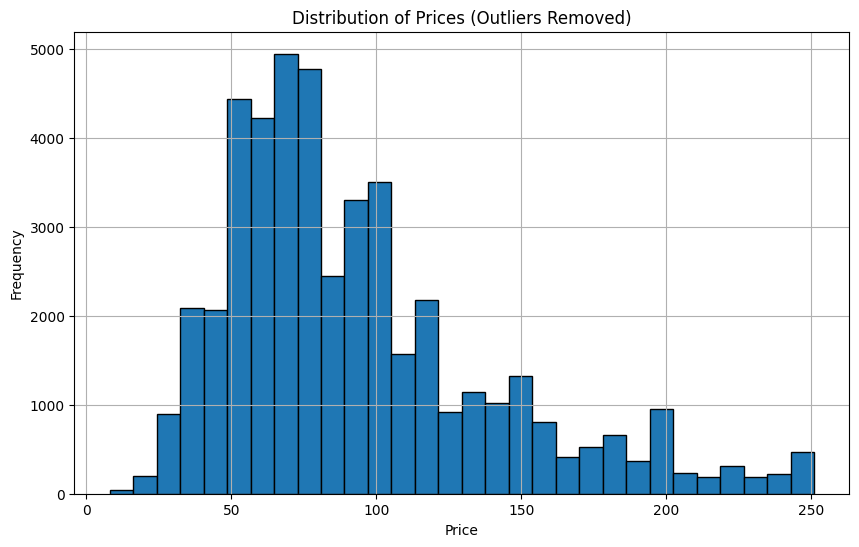

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df2 is your DataFrame with the 'price' column

# ----> Calculate IQR and thresholds for outlier removal <----
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ----> Filter data to remove outliers <----
filtered_df2 = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]

# Create the histogram using the filtered data
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(filtered_df2['price'], bins=30, edgecolor='black')  # bins control the number of bars
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Prices (Outliers Removed)")
plt.grid(True)  # Add a grid for better readability
plt.show()

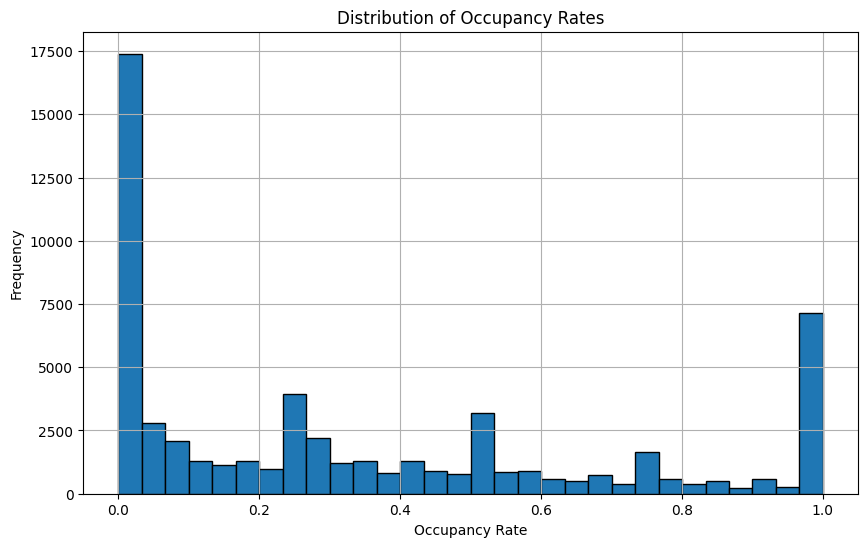

In [ ]:
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame with the 'Occupancy_Rate' column
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(df2['Occupancy_Rate'], bins=30, edgecolor='black')  # bins control the number of bars
plt.xlabel("Occupancy Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Occupancy Rates")
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame with 'neighbourhood_cleansed' and 'Occupancy_Rate' columns

# Group by neighborhood and calculate average occupancy rate
neighborhood_occupancy = df2.groupby('neighbourhood_cleansed')['Occupancy_Rate'].mean().sort_values(ascending=False)

# Print the top neighborhoods with highest average occupancy rates
print("Top Neighborhoods with Highest Average Occupancy Rates:")
print(neighborhood_occupancy.head(10))  # Adjust the number to see more neighborhoods

Top Neighborhoods with Highest Average Occupancy Rates:
neighbourhood_cleansed
Godrano                    1.000000
Alessandria della Rocca    1.000000
Cerami                     0.835274
Roccella Valdemone         0.816438
Alimena                    0.753425
Milena                     0.750685
Gallodoro                  0.689726
Santa Domenica Vittoria    0.667580
Casalvecchio Siculo        0.637965
Marianopoli                0.630137
Name: Occupancy_Rate, dtype: float64


In [ ]:
# Assuming df2 is your DataFrame
df2['Occupancy_Rate'] = (365 - df2['availability_365']) / 365

In [ ]:
# Assuming df2 is your DataFrame and you have already created the 'Occupancy_Rate' column
occupancy_rate_summary = df2['Occupancy_Rate'].describe()
print(occupancy_rate_summary)

count    57963.000000
mean         0.345081
std          0.348423
min          0.000000
25%          0.016438
50%          0.263014
75%          0.567123
max          1.000000
Name: Occupancy_Rate, dtype: float64


In [ ]:
df2['Successful'] = (df2['Occupancy_Rate'] > 0.7).astype(int)

In [ ]:
df2['Successful'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        0
3        0
4        0
        ..
57958    0
57959    0
57960    0
57961    0
57962    0
Name: Successful, Length: 57963, dtype: int64>

In [ ]:
columns_to_check = ['bedrooms', 'price', 'beds', 'review_scores_rating', 'accommodates', 'minimum_nights']

for column in columns_to_check:
    nan_count = df2[column].isna().sum()
    print(f"Number of NaNs in '{column}' column:", nan_count)

Number of NaNs in 'bedrooms' column: 798
Number of NaNs in 'price' column: 6347
Number of NaNs in 'beds' column: 6390
Number of NaNs in 'review_scores_rating' column: 17221
Number of NaNs in 'accommodates' column: 0
Number of NaNs in 'minimum_nights' column: 0


In [ ]:
unique_host_is_superhost = df2['host_is_superhost'].unique()
print(unique_host_is_superhost)

['f' 't' nan]


In [ ]:
nan_count_superhost = df2['host_is_superhost'].isna().sum()
print(f"Number of NaNs in 'host_is_superhost' column:", nan_count_superhost)

Number of NaNs in 'host_is_superhost' column: 1062


Top Performing Neighborhoods:
neighbourhood_cleansed
Godrano                    1.000000
Alessandria della Rocca    1.000000
Cerami                     0.875000
Capizzi                    0.750000
Roccella Valdemone         0.750000
Santa Domenica Vittoria    0.666667
Milena                     0.666667
Alimena                    0.666667
Casalvecchio Siculo        0.571429
Galati Mamertino           0.555556
Name: Successful, dtype: float64


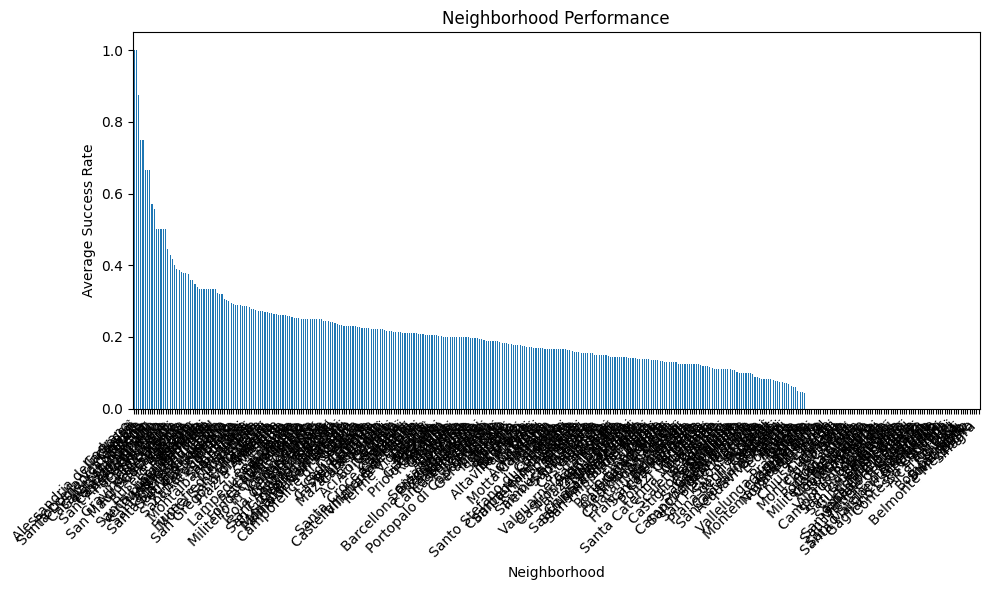

In [ ]:
import pandas as pd

# Assuming df2 is your DataFrame with 'neighbourhood_cleansed' and 'Successful' columns
# Group by neighborhood and calculate the average success rate
neighborhood_performance = df2.groupby('neighbourhood_cleansed')['Successful'].mean().sort_values(ascending=False)

# Print the top performing neighborhoods
print("Top Performing Neighborhoods:")
print(neighborhood_performance.head(10))  # Adjust the number to see more neighborhoods

# You can also visualize the performance using a bar chart
neighborhood_performance.plot(kind='bar', figsize=(10, 6))
import matplotlib.pyplot as plt
plt.xlabel("Neighborhood")
plt.ylabel("Average Success Rate")
plt.title("Neighborhood Performance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total listings in Sicily
total_listings = len(df2)

# Group by neighborhood and count listings
neighborhood_counts = df2.groupby('neighbourhood')['id'].count().reset_index(name='listings_count')

# Calculate proportion and add as a new column
neighborhood_counts['proportion'] = neighborhood_counts['listings_count'] / total_listings

# Merge the proportions back into the original DataFrame (df2)
df2 = pd.merge(df2, neighborhood_counts[['neighbourhood', 'proportion']], on='neighbourhood', how='left')

In [ ]:
# Sort by proportion and get the top 10
top_10_neighborhoods = neighborhood_counts.sort_values(by='proportion', ascending=False).head(10)

# Display the top 10
print(top_10_neighborhoods)

                                neighbourhood  listings_count  proportion
1277                  Palermo, Sicilia, Italy            3617    0.062402
437                   Catania, Sicilia, Italy            1963    0.033866
1860                 Syracuse, Sicilia, Italy            1438    0.024809
392   Castellammare del Golfo, Sicilia, Italy             650    0.011214
1885                 Taormina, Sicilia, Italy             586    0.010110
1213                     Noto, Sicilia, Italy             465    0.008022
1955                  Trapani, Sicilia, Italy             462    0.007971
1032                  Marsala, Sicilia, Italy             459    0.007919
138                     Avola, Sicilia, Italy             373    0.006435
1488                   Ragusa, Sicilia, Italy             366    0.006314


In [ ]:
target_cities = ['Syracuse', 'Catania', 'Palermo']

# Define neighboring neighborhoods for each city (replace with actual neighborhood names):
neighboring_neighborhoods = {
    'Syracuse': ['Ortigia', 'Grottasanta', 'Santa Lucia'],
    'Catania': ['Centro Storico', 'Librino', 'Picanello'],
    'Palermo': ['Centro Storico', 'Mondello', 'La Kalsa']
}

# Create a list to store listings in target areas
target_listings = []

# Iterate through each city and its neighbors
for city in target_cities:
    # Filter listings within the city
    # ----> Changed to use 'neighbourhood_cleansed' instead of 'city' <----
    city_listings = df2[df2['neighbourhood_cleansed'] == city]
    target_listings.extend(city_listings['id'].tolist())

    # Filter listings within neighboring neighborhoods
    for neighborhood in neighboring_neighborhoods[city]:
        neighborhood_listings = df2[df2['neighbourhood_cleansed'] == neighborhood]
        target_listings.extend(neighborhood_listings['id'].tolist())

# Get unique listing IDs
target_listings = list(set(target_listings))

# Count the number of listings
num_target_listings = len(target_listings)

print(f"Number of listings in target cities and neighborhoods: {num_target_listings}")

Number of listings in target cities and neighborhoods: 11783


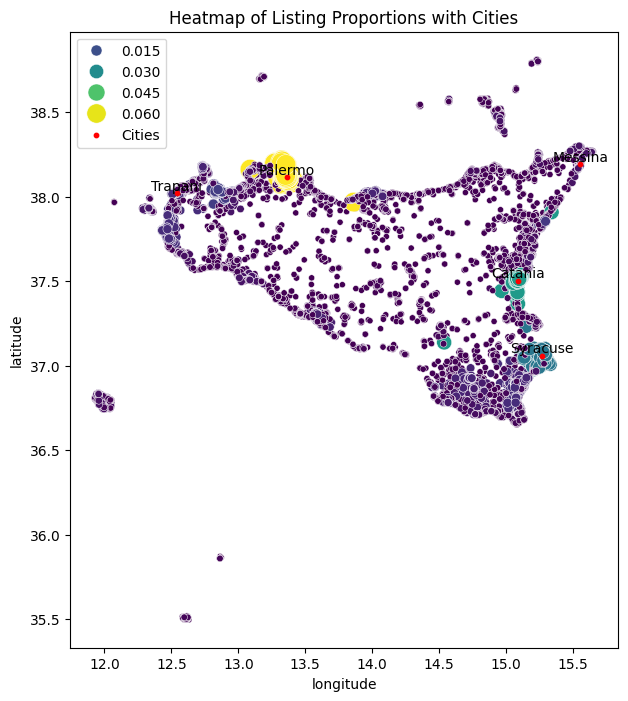

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

# Define city data (replace with your desired cities and coordinates)
city_data = {
    'city': ['Catania', 'Palermo', 'Messina', 'Syracuse', 'Trapani'],
    'latitude': [37.5027, 38.1157, 38.1936, 37.0592, 38.0197],
    'longitude': [15.0873, 13.3614, 15.5542, 15.2657, 12.5393]
}

# Create a GeoDataFrame for cities
cities_gdf = gpd.GeoDataFrame(
    city_data,
    geometry=gpd.points_from_xy(city_data['longitude'], city_data['latitude']),
    crs=df5.crs  # Use the same CRS as your neighborhoods GeoDataFrame
)

# Plotting the map with both heatmap and city markers
fig, ax = plt.subplots(figsize=(10, 8))

# Heatmap layer
sns.scatterplot(x='longitude', y='latitude', hue='proportion', data=df2, palette='viridis', size='proportion', sizes=(20, 200), ax=ax)

# City markers layer
cities_gdf.plot(ax=ax, marker='o', color='red', markersize=10, label='Cities')

# Adding labels for cities
for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf['city']):
    ax.text(x, y, label, fontsize=10, ha='center', va='bottom')

plt.title('Heatmap of Listing Proportions with Cities')
plt.legend()
plt.show()

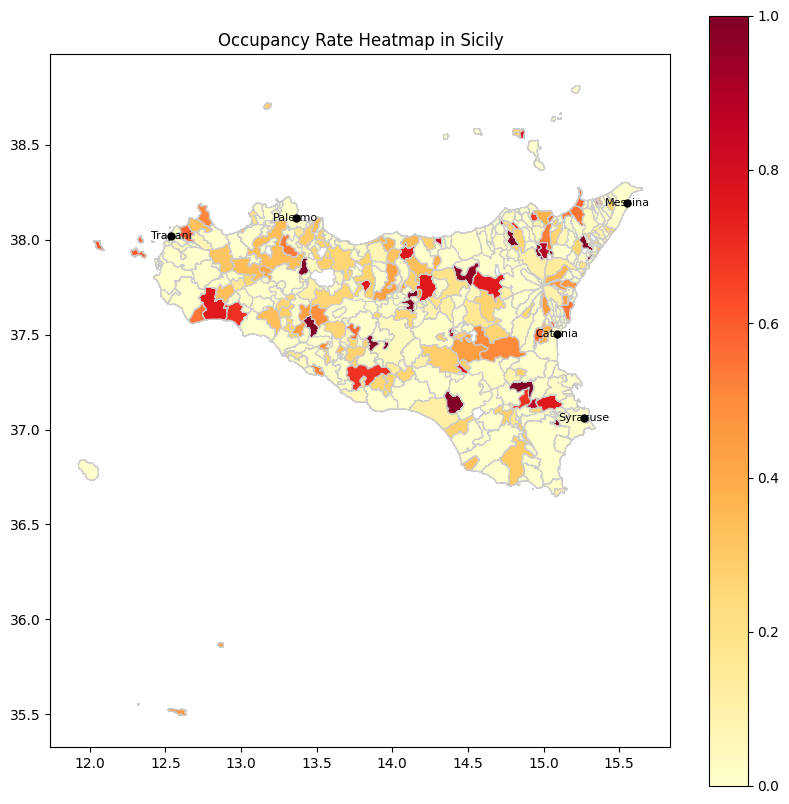

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define city data (replace with your desired cities and coordinates)
city_data = {
    'city': ['Catania', 'Palermo', 'Messina', 'Syracuse', 'Trapani'],
    'latitude': [37.5027, 38.1157, 38.1936, 37.0592, 38.0197],
    'longitude': [15.0873, 13.3614, 15.5542, 15.2657, 12.5393]
}

# Create a GeoDataFrame for cities
cities_gdf = gpd.GeoDataFrame(
    city_data,
    geometry=gpd.points_from_xy(city_data['longitude'], city_data['latitude']),
    crs=df5.crs  # Use the same CRS as your neighborhoods GeoDataFrame
)

# 1. Merge Occupancy Rate with GeoDataFrame
# ----> Check if 'neighbourhood_cleansed' exists in df2,
#       if not, use the correct column name <----
if 'neighbourhood_cleansed' not in df2.columns:
    # Replace 'neighbourhood' with the actual column name in df2
    merge_column = 'neighbourhood'
else:
    merge_column = 'neighbourhood_cleansed'

merged_data = df5.merge(df2[[merge_column, 'Occupancy_Rate']],
                        left_on='neighbourhood', right_on=merge_column, how='left')

# Drop the duplicate column after merge if necessary
if merge_column != 'neighbourhood':
    merged_data = merged_data.drop(columns=[merge_column])
# 2. Create the Heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Occupancy_Rate', cmap='YlOrRd', linewidth=0.8,
                 ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf['city']):
    ax.plot(x, y, marker='o', markersize=5, color='black')
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

ax.set_title('Occupancy Rate Heatmap in Sicily')
plt.show()

In [ ]:
import pandas as pd

# Assuming you have the 'Successful' column in df2

# 1. Compare average review scores:
avg_review_scores = df2.groupby('Successful')['review_scores_rating'].mean()
print("Average Review Scores:\n", avg_review_scores)

# 2. Analyze pricing differences:
avg_price = df2.groupby('Successful')['price'].mean()
print("\nAverage Price:\n", avg_price)

# 3. Explore property types:
property_type_distribution = df2.groupby(['Successful', 'property_type'])['id'].count().reset_index(name='count')
print("\nProperty Type Distribution:\n", property_type_distribution)

# 4. Investigate host characteristics:
superhost_distribution = df2.groupby(['Successful', 'host_is_superhost'])['id'].count().reset_index(name='count')
print("\nSuperhost Distribution:\n", superhost_distribution)

# 5. Examine location and neighborhood:
neighborhood_occupancy = df2.groupby(['Successful', 'neighbourhood_cleansed'])['Occupancy_Rate'].mean().reset_index()
print("\nNeighborhood Occupancy:\n", neighborhood_occupancy)

# 6. Explore room types:
room_type_distribution = df2.groupby(['Successful', 'room_type'])['id'].count().reset_index(name='count')
print("\nRoom Type Distribution:\n", room_type_distribution)

Average Review Scores:
 Successful
0    4.734925
1    4.727314
Name: review_scores_rating, dtype: float64

Average Price:
 Successful
0    290.456601
1    405.710056
Name: price, dtype: float64

Property Type Distribution:
      Successful          property_type  count
0             0                   Barn      8
1             0                   Boat     39
2             0              Camper/RV     21
3             0               Campsite      7
4             0        Casa particular     66
..          ...                    ...    ...
157           1  Shared room in hostel      3
158           1                   Tent      9
159           1              Tiny home    129
160           1                  Tower      1
161           1              Treehouse      1

[162 rows x 3 columns]

Superhost Distribution:
    Successful host_is_superhost  count
0           0                 f  35243
1           0                 t  10067
2           1                 f   9585
3           1     

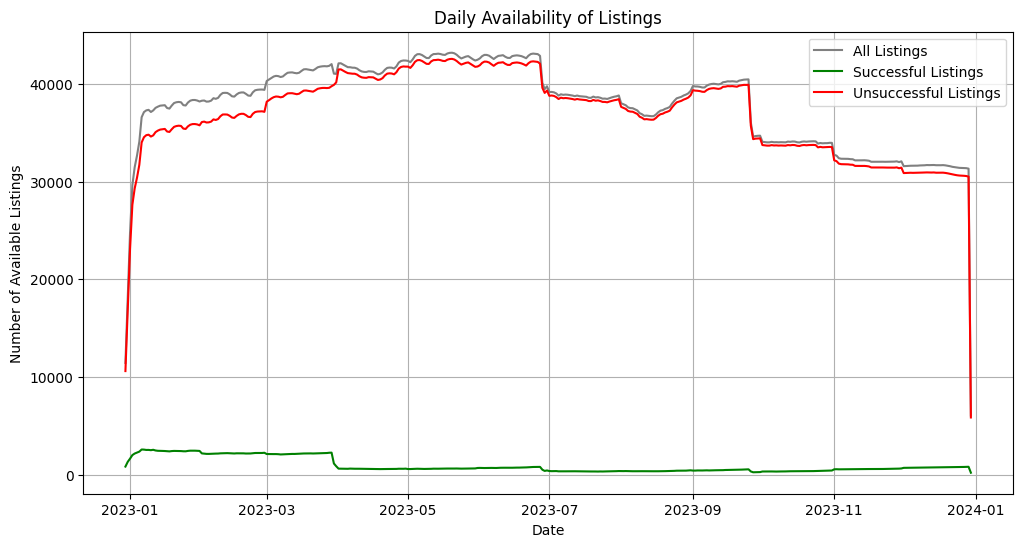

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Convert 'date' column to datetime:
df1['date'] = pd.to_datetime(df1['date'])

# 3. Subtract one year from the dates:
df1['date'] = df1['date'] - pd.DateOffset(years=1)

# 4. Filter for available listings:
available_listings = df1[df1['available'] == 't']

# Merge with df2 to get 'Successful' column
available_listings = pd.merge(available_listings, df2[['id', 'Successful']], left_on='listing_id', right_on='id', how='left')

# 5. Group by date and Successful, then count available listings:
daily_availability = available_listings.groupby(['date', 'Successful'])['listing_id'].count().reset_index(name='available_count')

# 6. Create the time series plot:
plt.figure(figsize=(12, 6))

# Plot for all listings
plt.plot(daily_availability['date'].unique(), daily_availability.groupby('date')['available_count'].sum(), label='All Listings', color='gray')

# Plot for successful listings
plt.plot(daily_availability[daily_availability['Successful'] == 1]['date'],
         daily_availability[daily_availability['Successful'] == 1]['available_count'],
         label='Successful Listings', color='green')

# Plot for unsuccessful listings
plt.plot(daily_availability[daily_availability['Successful'] == 0]['date'],
         daily_availability[daily_availability['Successful'] == 0]['available_count'],
         label='Unsuccessful Listings', color='red')

plt.xlabel("Date")
plt.ylabel("Number of Available Listings")
plt.title("Daily Availability of Listings")
plt.grid(True)
plt.legend()
plt.show()

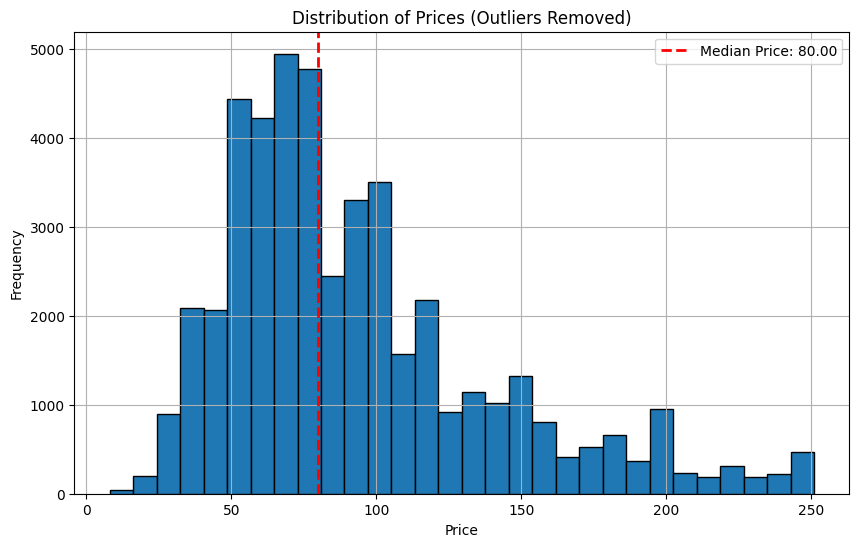

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----> Calculate IQR and thresholds for outlier removal <----
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the median price
median_price = filtered_df2['price'].median()



# ----> Filter data to remove outliers <----
filtered_df2 = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]

# Create the histogram using the filtered data
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.hist(filtered_df2['price'], bins=30, edgecolor='black')  # bins control the number of bars
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.axvline(median_price, color='red', linestyle='dashed', linewidth=2, label=f'Median Price: {median_price:.2f}')
plt.legend()
plt.title("Distribution of Prices (Outliers Removed)")
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
# Convert 'listing_id' in df4 to int64, handling errors
df4['listing_id'] = pd.to_numeric(df4['listing_id'], errors='coerce').astype('Int64')

# Now perform the merge
merged_df = pd.merge(df4, df2[['id', 'Successful']], left_on='listing_id', right_on='id', how='left')

In [ ]:
successful_reviews = merged_df[merged_df['Successful'] == 1]
unsuccessful_reviews = merged_df[merged_df['Successful'] == 0]

<ipython-input-39-791df54df391>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


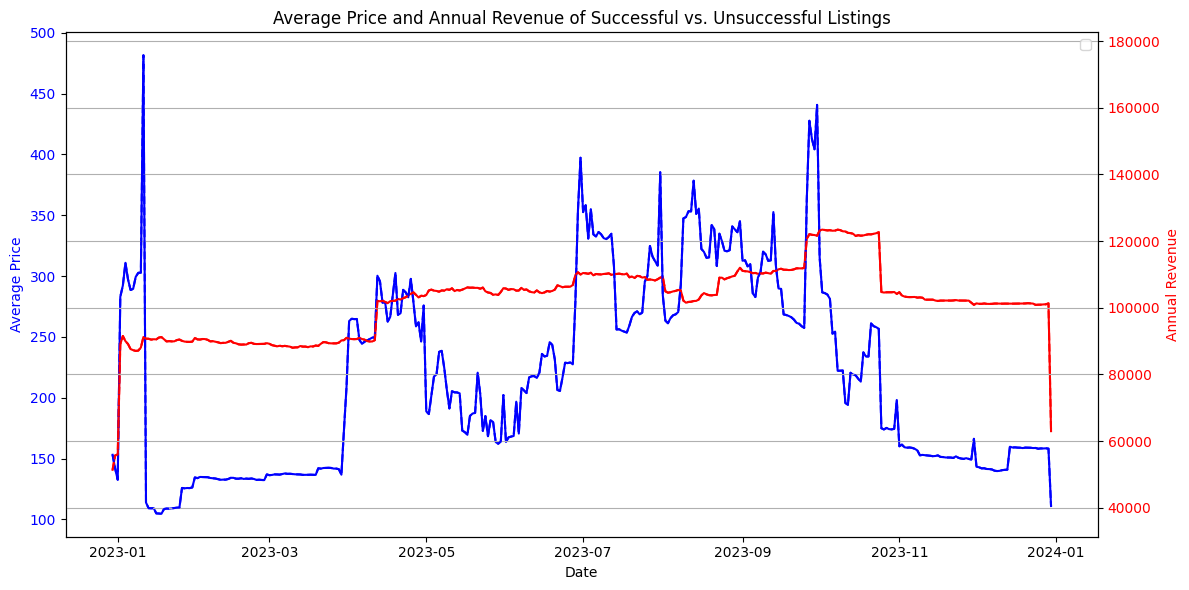

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Merge df1 (calendar) and df2 (listings)
# Convert 'listing_id' in df1 to int64
df1['listing_id'] = df1['listing_id'].astype('int64')
merged_df = pd.merge(df1, df2[['id', 'Successful', 'price']], left_on='listing_id', right_on='id', how='left')

# 2. Convert 'date' to datetime and subtract one year
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['date'] = merged_df['date'] - pd.DateOffset(years=1)

# 3. Filter for available listings
available_listings = merged_df[merged_df['available'] == 't']

# ----> Change 2: Group by date and Successful, calculate average price <----
# Use 'price_y' for the average price calculation as it's from df2
# (listings data) and likely contains the correct price information.
daily_avg_price = available_listings.groupby(['date', 'Successful'])['price_y'].mean().reset_index()

# 6. Calculate annual revenue (assuming price is daily rate)
daily_avg_price['annual_revenue'] = daily_avg_price['price_y'] * 365

# 7. Create time series plots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average price
ax1.plot(daily_avg_price[daily_avg_price['Successful'] == 1]['date'],
         daily_avg_price[daily_avg_price['Successful'] == 1]['price_y'],
         label='Successful Listings', color='blue')
ax1.plot(daily_avg_price[daily_avg_price['Successful'] == 0]['date'],
         daily_avg_price[daily_avg_price['Successful'] == 0]['price_y'],
         label='Unsuccessful Listings', color='red')
ax1.set_xlabel("Date")
ax1.set_ylabel("Average Price", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for annual revenue
ax2 = ax1.twinx()
ax2.plot(daily_avg_price[daily_avg_price['Successful'] == 1]['date'],
         daily_avg_price[daily_avg_price['Successful'] == 1]['annual_revenue'],
         linestyle='--', color='blue')
ax2.plot(daily_avg_price[daily_avg_price['Successful'] == 0]['date'],
         daily_avg_price[daily_avg_price['Successful'] == 0]['annual_revenue'],
         linestyle='--', color='red')
ax2.set_ylabel("Annual Revenue", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Average Price and Annual Revenue of Successful vs. Unsuccessful Listings")
fig.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (your existing code for merging, filtering, and calculating daily_avg_price) ...

# Calculate average price for successful listings
avg_price_successful = daily_avg_price[daily_avg_price['Successful'] == 1]['price_y'].mean()

# Calculate average price for unsuccessful listings
avg_price_unsuccessful = daily_avg_price[daily_avg_price['Successful'] == 0]['price_y'].mean()

print(f"Average Price for Successful Listings: ${avg_price_successful:.2f}")
print(f"Average Price for Unsuccessful Listings: ${avg_price_unsuccessful:.2f}")

# ... (your existing code for plotting) ...

Average Price for Successful Listings: $405.92
Average Price for Unsuccessful Listings: $259.92


In [ ]:
!pip install langdetect
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from langdetect import detect
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource

def preprocess_text(text):
    # 1. Detect the language of the comment
    try:
        language = detect(text)
        if language != 'en':
            return '' # Return empty string for non-English comments
    except:
        return '' # Return empty string if language detection fails

    # 2. Lowercase the text
    text = text.lower()
    # 3. Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # 4. Tokenize the text
    tokens = nltk.word_tokenize(text)
    # 5. Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # 6. Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # 7. Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

df4['preprocessed_comments'] = df4['comments'].apply(preprocess_text)

# Remove rows with empty preprocessed comments (non-English comments)
reviews = df4[df4['preprocessed_comments'] != '']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=eef29b385c6fc9fd549123a26cc4ce51ce1d667dbff21f758f83c9149d2a7e38
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


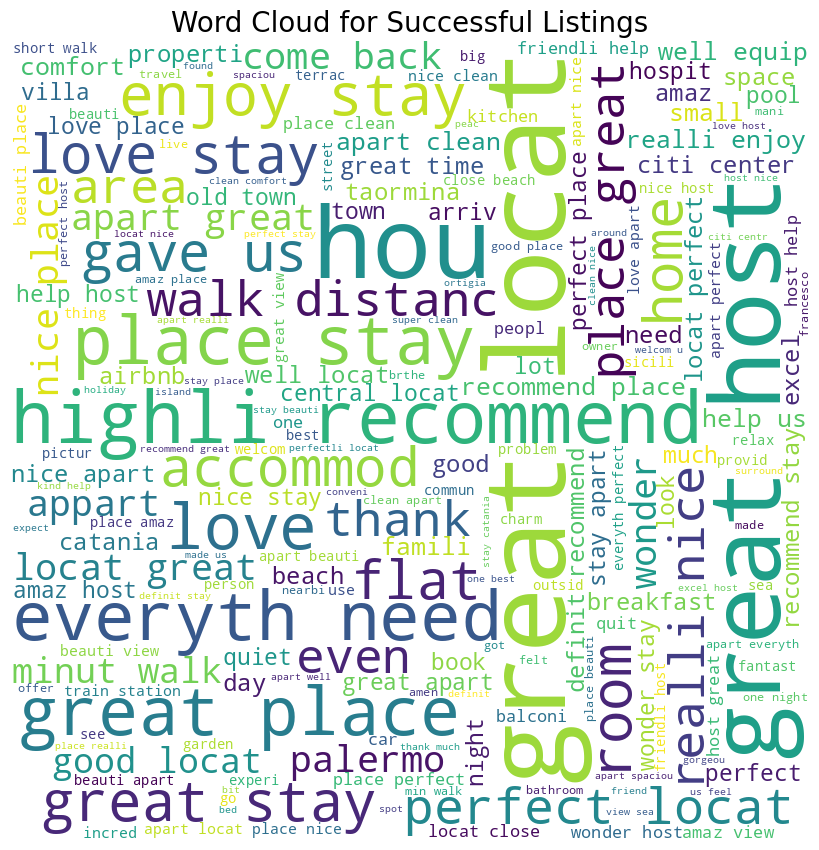

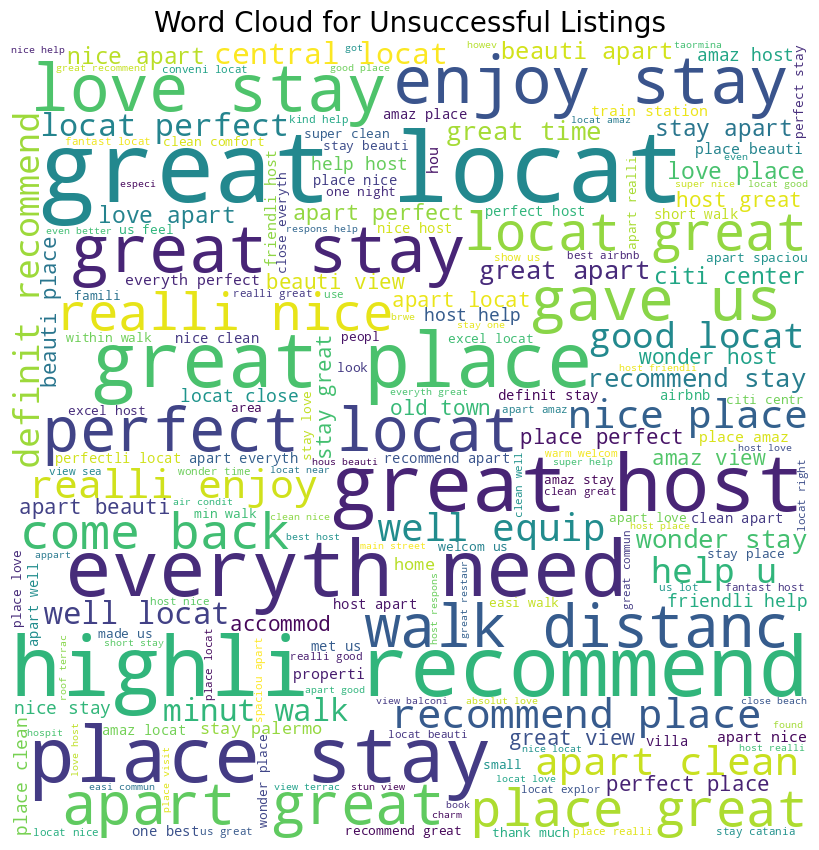

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Function to generate word cloud
def generate_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(text)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize=20)
    plt.show()

# Generate word cloud for successful reviews
successful_text = " ".join(successful_reviews['preprocessed_comments'].astype(str).tolist())
generate_wordcloud(successful_text, "Word Cloud for Successful Listings")

# Generate word cloud for unsuccessful reviews
unsuccessful_text = " ".join(unsuccessful_reviews['preprocessed_comments'].astype(str).tolist())
generate_wordcloud(unsuccessful_text, "Word Cloud for Unsuccessful Listings")